In [30]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# Read in the data
df = pd.read_csv(r'C:\Users\nitin\OneDrive\Desktop\Data Analyst\movies.csv')

In [32]:
# Look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [33]:
# Check if there is any missing data present or not
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [34]:
# Data types for our features
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [35]:
df['budget'].isna().sum()

2171

In [36]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [37]:
# Changing the datatype for the 'budget' and 'gross' feature
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int).abs() 

df =  df[df['gross']>0]

In [38]:
df.isna().sum()

name         0
rating      54
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       3
star         0
country      1
budget       0
gross        0
company     10
runtime      1
dtype: int64

In [39]:
# Removing null values as the number is very small we can ignore it
df.dropna(inplace=True)

In [40]:
df.shape

(7409, 15)

In [41]:
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [42]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [43]:
# Creating correct year date column as there are some yearswhich are not matching with 

df['cleaned_released'] = df['released'].str.extract(r'([a-zA-Z]+ \d{1,2}, \d{4})')

# Convert to datetime and extract the year

df['correct_year'] = pd.to_datetime(df['cleaned_released'], format='%B %d, %Y', errors='coerce').dt.year


In [44]:
# Check how many years are not matching with 'year' ['year' column is provided with dataset]
(df['year'] != df['correct_year']).sum() # 1322 rows are not matching 

# Will drop the 'year' column later and use 'correct_year' column

1257

In [45]:
# Removing restrictions on output rows 
pd.set_option('display.max_rows', None)

In [58]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,6370,6,6,1980,"June 13, 1980 (United States)",8.4,927000.0,2471,3851,979,52,19000000,46998772,2179,146.0,1980.0
1,5371,6,1,1980,"July 2, 1980 (United States)",5.8,65000.0,2169,1564,306,53,4500000,58853106,686,104.0,1980.0
2,4954,4,0,1980,"June 20, 1980 (United States)",8.7,1200000.0,1063,2464,1642,53,18000000,538375067,1446,124.0,1980.0
3,277,4,4,1980,"July 2, 1980 (United States)",7.7,221000.0,1248,1920,2112,53,3500000,83453539,1697,88.0,1980.0
4,991,6,4,1980,"July 25, 1980 (United States)",7.3,108000.0,1010,499,387,53,6000000,39846344,1665,98.0,1980.0


In [60]:
df['company'].drop_duplicates().sort_values(inplace=False,ascending=False)
# By checking the output we can say there are no values that we can aggregate in 'comapany' column

7129    2241
5664    2240
6412    2239
4007    2238
6793    2237
6420    2236
3776    2235
524     2234
3330    2233
146     2232
2213    2231
6222    2230
3698    2229
535     2228
5180    2227
3193    2226
1321    2225
1329    2224
789     2223
5125    2222
5499    2221
4618    2220
4990    2219
5410    2218
7576    2217
3310    2216
6798    2215
6265    2214
4392    2213
4999    2212
425     2211
712     2210
3158    2209
3637    2208
4272    2207
450     2206
3624    2205
3943    2204
2084    2203
2355    2202
6606    2201
5276    2200
7032    2199
4863    2198
5550    2197
4572    2196
6616    2195
1306    2194
1475    2193
5715    2192
1744    2191
1304    2190
7225    2189
5496    2188
6672    2187
5395    2186
4557    2185
4505    2184
7267    2183
2284    2182
6578    2181
317     2180
0       2179
7401    2178
40      2177
403     2176
117     2175
5075    2174
729     2173
4975    2172
6166    2171
5272    2170
5409    2169
1115    2168
6647    2167
1307    2166
2241    2165

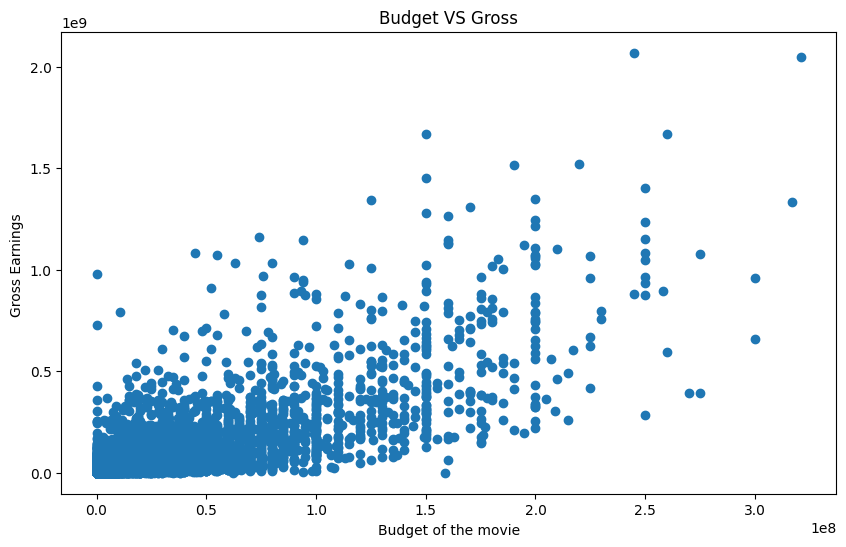

In [48]:
# let's plot scatter plot 'budget' vs 'gross'
plt.figure(figsize=(10, 6))
plt.scatter(x=df['budget'],y=df['gross'])
plt.xlabel('Budget of the movie')
plt.ylabel('Gross Earnings ')
plt.title('Budget VS Gross')
plt.show();

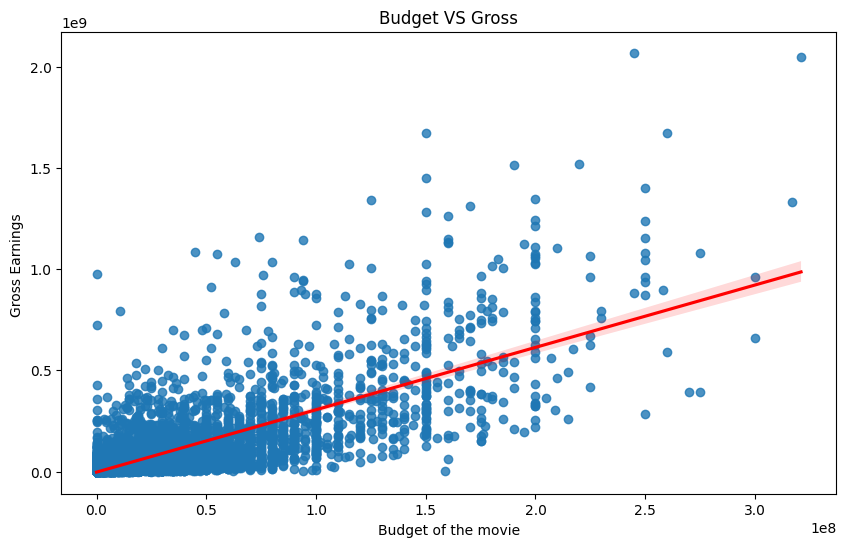

In [49]:
# Plot regplot using seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='budget',y='gross',data=df,line_kws={'color':'red'})
plt.xlabel('Budget of the movie')
plt.ylabel('Gross Earnings ')
plt.title('Budget VS Gross');

In [50]:
# Dropping 'year' column as we have created 'correct_year' column
#df.drop(columns=['year','cleaned_released'],inplace=True)
df.drop(columns='cleaned_released',inplace=True)
# Lets check the actual correlation
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.093475,0.218999,0.307242,0.267162,0.113633,0.997744
score,0.093475,1.000000,0.414417,0.049137,0.186954,0.396080,0.103352
votes,0.218999,0.414417,1.000000,0.475201,0.630933,0.304008,0.212704
budget,0.307242,0.049137,0.475201,1.000000,0.753592,0.262484,0.296101
gross,0.267162,0.186954,0.630933,0.753592,1.000000,0.233815,0.258483
runtime,0.113633,0.396080,0.304008,0.262484,0.233815,1.000000,0.113723
correct_year,0.997744,0.103352,0.212704,0.296101,0.258483,0.113723,1.000000


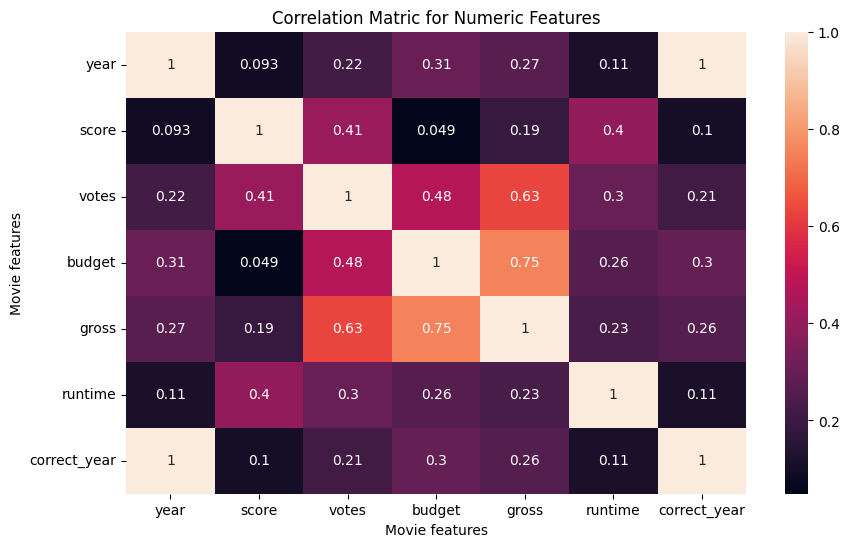

In [51]:
# Let's plot heatmap for correlation
correlation_matric = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matric,annot=True)
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.title('Correlation Matric for Numeric Features');

In [52]:
# Let's encode the string featues
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to each column
df['name'] = encoder.fit_transform(df['name'])
df['rating'] = encoder.fit_transform(df['rating'])
df['genre'] = encoder.fit_transform(df['genre'])
df['director'] = encoder.fit_transform(df['director'])
df['writer'] = encoder.fit_transform(df['writer'])
df['star'] = encoder.fit_transform(df['star'])
df['country'] = encoder.fit_transform(df['country'])
df['company'] = encoder.fit_transform(df['company'])


In [53]:
df.corr(numeric_only=True)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
name,1.000000,-0.010861,0.017649,0.009551,0.015420,0.012576,0.010260,0.009217,0.007128,-0.012462,0.020954,0.009751,0.008588,0.010081,0.009006
rating,-0.010861,1.000000,0.118596,0.026005,0.018725,0.017002,0.013599,-0.003281,0.002312,0.033639,-0.130261,-0.137439,-0.083038,0.072842,0.027077
genre,0.017649,0.118596,1.000000,-0.084451,0.045983,-0.147907,-0.015549,0.009104,-0.000793,-0.029116,-0.345937,-0.250507,-0.071515,-0.040402,-0.076853
year,0.009551,0.026005,-0.084451,1.000000,0.093475,0.218999,-0.021023,-0.011567,-0.031824,-0.080265,0.307242,0.267162,-0.016009,0.113633,0.997744
score,0.015420,0.018725,0.045983,0.093475,1.000000,0.414417,0.008975,0.020212,-0.001943,-0.126863,0.049137,0.186954,-0.000869,0.396080,0.103352
votes,0.012576,0.017002,-0.147907,0.218999,0.414417,1.000000,0.002020,0.001773,-0.024514,0.066367,0.475201,0.630933,0.126918,0.304008,0.212704
director,0.010260,0.013599,-0.015549,-0.021023,0.008975,0.002020,1.000000,0.296919,0.036497,0.012868,0.007886,-0.009593,0.001565,0.017053,-0.020742
writer,0.009217,-0.003281,0.009104,-0.011567,0.020212,0.001773,0.296919,1.000000,0.024405,0.012531,-0.025088,-0.020854,0.003627,-0.003636,-0.010569
star,0.007128,0.002312,-0.000793,-0.031824,-0.001943,-0.024514,0.036497,0.024405,1.000000,-0.018979,-0.026024,-0.008056,0.005170,0.006703,-0.033639
country,-0.012462,0.033639,-0.029116,-0.080265,-0.126863,0.066367,0.012868,0.012531,-0.018979,1.000000,0.123397,0.093918,0.089626,-0.080447,-0.093542


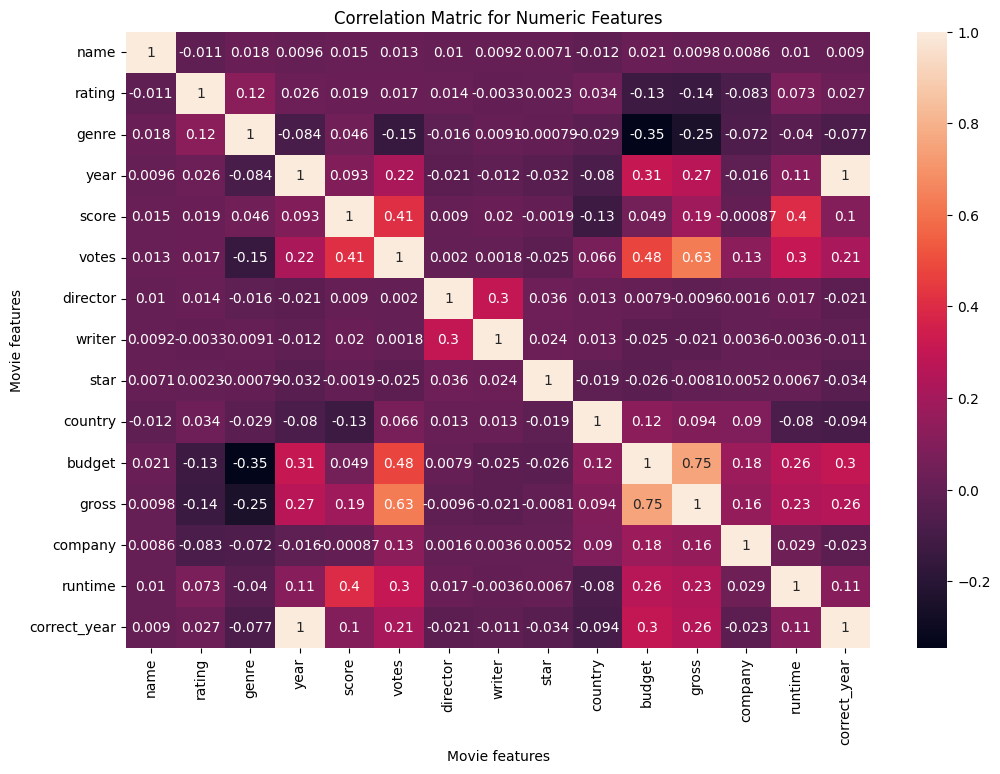

In [54]:
# Now we will check correlation for all features
# Let's plot heatmap for correlation
correlation_matric = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matric,annot=True)
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.title('Correlation Matric for Numeric Features');

In [55]:
# It's bit difficult to read in this graph
corr = df.corr(numeric_only=True)
corr_unstack = corr.unstack()
corr_unstack

name          name            1.000000
              rating         -0.010861
              genre           0.017649
              year            0.009551
              score           0.015420
              votes           0.012576
              director        0.010260
              writer          0.009217
              star            0.007128
              country        -0.012462
              budget          0.020954
              gross           0.009751
              company         0.008588
              runtime         0.010081
              correct_year    0.009006
rating        name           -0.010861
              rating          1.000000
              genre           0.118596
              year            0.026005
              score           0.018725
              votes           0.017002
              director        0.013599
              writer         -0.003281
              star            0.002312
              country         0.033639
              budget     

In [56]:
#Let's pair correlation
corr_pair = corr_unstack.sort_values(ascending=False)
corr_pair

name          name            1.000000
rating        rating          1.000000
runtime       runtime         1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
year          year            1.000000
genre         genre           1.000000
writer        writer          1.000000
correct_year  correct_year    1.000000
              year            0.997744
year          correct_year    0.997744
gross         budget          0.753592
budget        gross           0.753592
gross         votes           0.630933
votes         gross           0.630933
              budget          0.475201
budget        votes           0.475201
votes         score           0.414417
score         votes           0.414417
              runtime    

In [57]:
# We will extract high correlated features [>0.5]
corr_pair[(corr_pair)>=0.5]

name          name            1.000000
rating        rating          1.000000
runtime       runtime         1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
year          year            1.000000
genre         genre           1.000000
writer        writer          1.000000
correct_year  correct_year    1.000000
              year            0.997744
year          correct_year    0.997744
gross         budget          0.753592
budget        gross           0.753592
gross         votes           0.630933
votes         gross           0.630933
dtype: float64

### Conclusion - From above output we can say that budget and votes have the strong corrlation with gross earnings of the movie. Where as company has very low correlation with gross earning.